In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [12]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [13]:
exp = f'resource_stimulus_global_A-B-C_modified'

In [14]:
chdir = True

In [15]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [17]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 45
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2284 non-null   float64
 1   output_rate                         2284 non-null   float64
 2   firewall_instructions               2284 non-null   float64
 3   nf_router_instructions              2284 non-null   float64
 4   ndpi_stats_instructions             2284 non-null   float64
 5   payload_scan_instructions           2284 non-null   float64
 6   bridge_instructions                 2284 non-null   float64
 7   firewall_branches                   2284 non-null   float64
 8   nf_router_branches                  2284 non-null   float64
 9   ndpi_stats_branches                 2284 non-null   float64
 10  payload_scan_branches               2284 non-null   float64
 11  bridge_branches                     2284 non-

# Compare data preprocessing

In [74]:
#A：data without clearning + without feature selection + random model + without hyperparameters tunning 

In [18]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], 0)
df = data.dropna()

In [19]:
# training  
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor 
X = df.drop(['input_rate','output_rate', 'latency',"bridge_LLC-stores","bridge_L1-dcache-load-misses","bridge_instructions",
             "bridge_cache-references","bridge_LLC-loads","bridge_cycles"], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
#model = GradientBoostingRegressor()
model = LinearRegression()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.6994737279493749


In [90]:
#B. data clean + without feature selection + random model +without hyperparameters tunning 

In [20]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], 0)
df = data.dropna()

In [21]:
# training  
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor 
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
#model = GradientBoostingRegressor()
model = LinearRegression()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7066219914161506


In [22]:
#C. data clean + without feature selection + random model +without hyperparameters tunning

In [23]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [24]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
#X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)#,'bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
#model = GradientBoostingRegressor()
model = LinearRegression()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.7066219914161506


In [25]:
#D. data clean + with feature selection + random model +without hyperparameters tunning = 

In [26]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [27]:
# training 
X = df.drop(["input_rate",'output_rate', 'latency'], axis=1)
#X = df.drop(['output_rate', 'latency','bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

2284


In [28]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))

In [29]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)

Epoch 1/100
100/100 [==============================] - 7s 11ms/step - loss: 1582960.5000
Epoch 2/100
100/100 [==============================] - 1s 11ms/step - loss: 252782.9219
Epoch 3/100
100/100 [==============================] - 1s 11ms/step - loss: 211979.3750
Epoch 4/100
100/100 [==============================] - 1s 9ms/step - loss: 190819.5469
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 175555.5781
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 165683.6719
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 158416.9844
Epoch 8/100
100/100 [==============================] - 1s 5ms/step - loss: 149665.3750
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 140417.3125
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 132359.6562
Epoch 11/100
100/100 [==============================] - 0s 4ms/step - loss: 129748.0547
Epoch 12/100
100/100 [===============

100/100 [==============================] - 1s 9ms/step - loss: 68071.5234
Epoch 95/100
100/100 [==============================] - 1s 10ms/step - loss: 68902.7578
Epoch 96/100
100/100 [==============================] - 1s 7ms/step - loss: 68692.3125
Epoch 97/100
100/100 [==============================] - 1s 9ms/step - loss: 68322.3984
Epoch 98/100
100/100 [==============================] - 1s 8ms/step - loss: 68784.7500
Epoch 99/100
100/100 [==============================] - 1s 8ms/step - loss: 67292.7344
Epoch 100/100
100/100 [==============================] - 1s 7ms/step - loss: 66005.7344


In [30]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

22/22 [==============================] - 0s 5ms/step
R-squared: 0.6999270042121544


# Optimal

In [33]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [35]:
# training 
X = df.drop(['output_rate', 'latency'], axis=1)
X_test = df.drop(['input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

2284


In [36]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add input layer and hidden layers with L2 regularization
#model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Add output layer
model.add(Dense(1))

In [37]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 1085504.7500
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 138954.7031
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 102507.4141
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 92558.7812
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 79936.2188
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 77192.9766
Epoch 7/100
200/200 [==============================] - 2s 8ms/step - loss: 68342.2578
Epoch 8/100
200/200 [==============================] - 1s 6ms/step - loss: 64971.5977
Epoch 9/100
200/200 [==============================] - 1s 6ms/step - loss: 62392.0742
Epoch 10/100
200/200 [==============================] - 1s 6ms/step - loss: 59937.1914
Epoch 11/100
200/200 [==============================] - 2s 8ms/step - loss: 57524.5391
Epoch 12/100
200/200 [==========================

200/200 [==============================] - 1s 7ms/step - loss: 35425.4453
Epoch 96/100
200/200 [==============================] - 1s 7ms/step - loss: 35654.9219
Epoch 97/100
200/200 [==============================] - 1s 6ms/step - loss: 36060.9648
Epoch 98/100
200/200 [==============================] - 1s 7ms/step - loss: 35842.6641
Epoch 99/100
200/200 [==============================] - 1s 6ms/step - loss: 34777.1055
Epoch 100/100
200/200 [==============================] - 1s 6ms/step - loss: 34892.2461


22/22 [==============================] - 0s 1ms/step


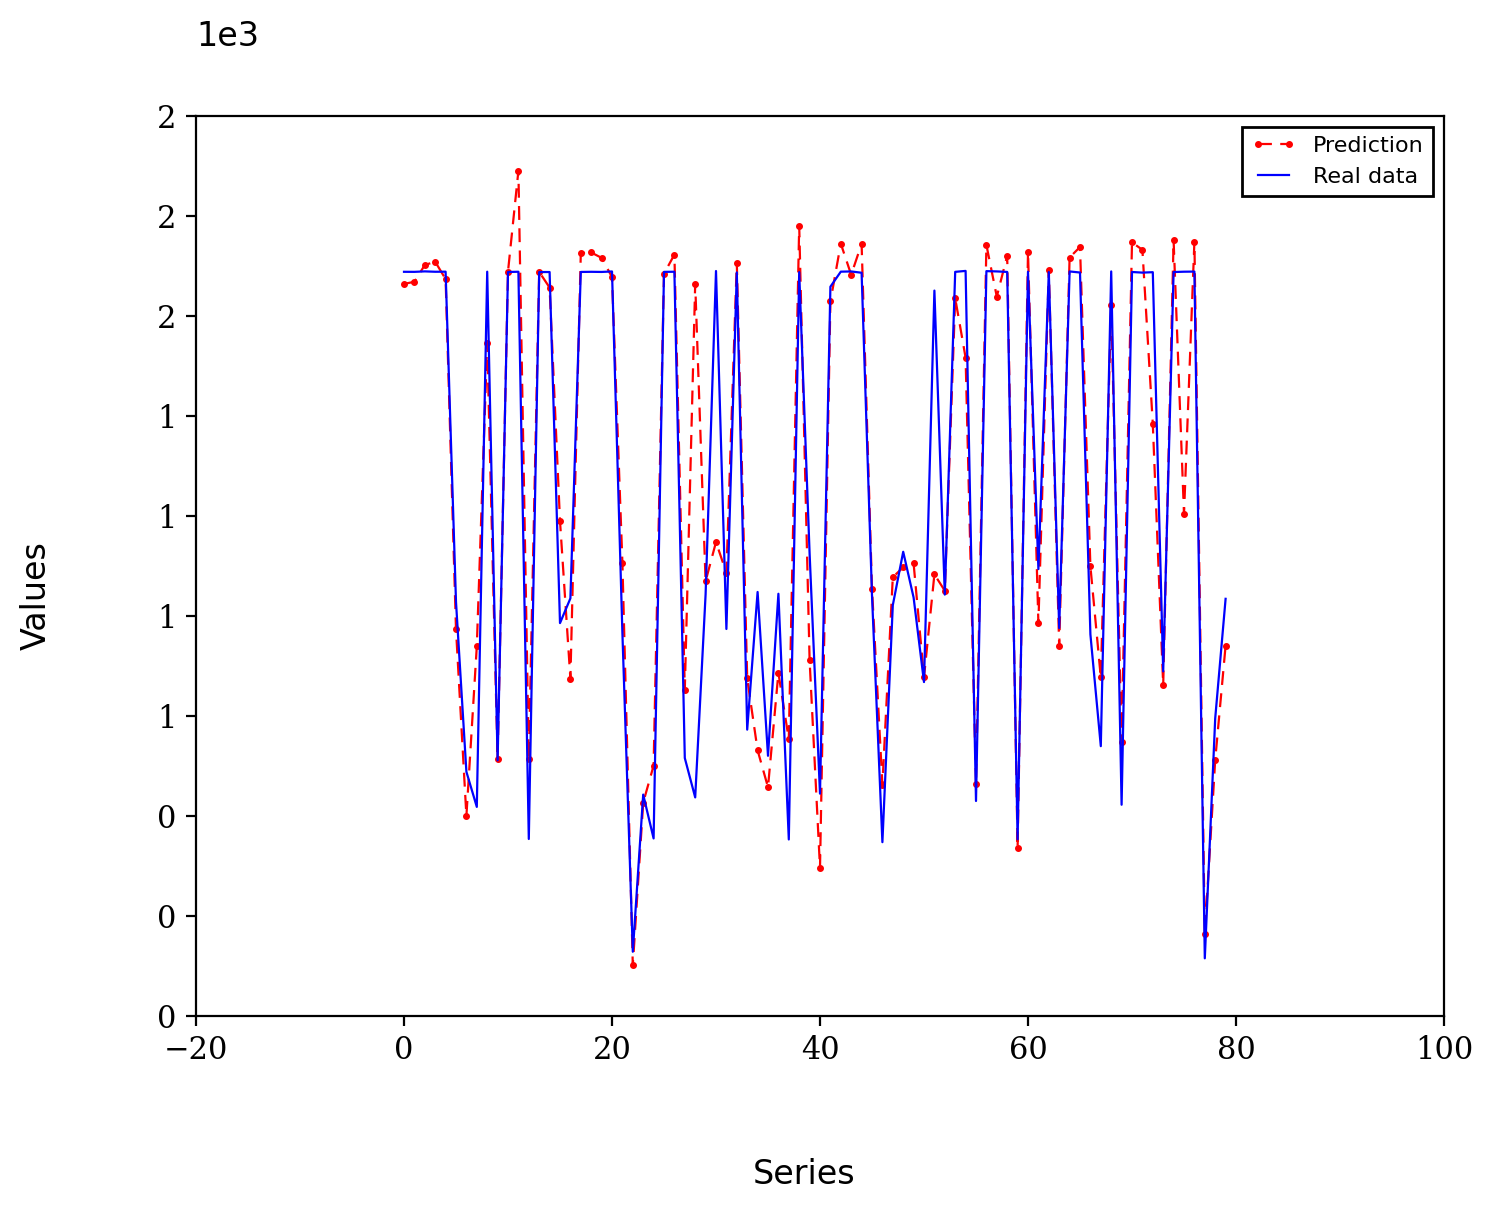

In [38]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:80], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:80], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')


plt.show()

In [39]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8204759698341642


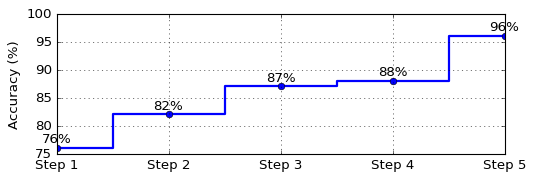

In [29]:
import matplotlib.pyplot as plt

# Data to be plotted
performance = [76,82,87,88,96]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']

# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7, 2.5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.step(steps, performance, where='mid', linewidth=2, marker='o')
#plt.xlabel('Steps')
plt.ylabel('Accuracy (%)')
#plt.title('Performance Improvement at Each Step')
#plt.ylim(60, 100)  # Setting the y-axis limits to better visualize the performance

# Adding the performance values on top of each point
for x, y in zip(steps, performance):
    plt.text(x, y + 1, f'{y}%', ha='center')

plt.grid(True)
plt.savefig('accuracy_step.pdf',bbox_inches='tight')
plt.show()
